In [26]:
# Import the modules
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sympy as sy
from matplotlib import pyplot as plt
%matplotlib inline

from scipy import optimize
# we will use the optimizer

# few elements
D = lambda L: [(np.array([[1, L],[0, 1]]), L)]
Q = lambda f: [(np.array([[1, 0],[-1/f, 1]]), 0)]


# few useful function

def compress_beamline(my_beamline, dimension=2):
    M=np.eye(dimension)
    s=0
    for i in my_beamline:
        M=i[0] @ M
        s=s+i[1]
    return [(M,s)]   

def R2beta(R):
    mu=np.arccos(0.5*(R[0,0]+R[1,1]))
    if (R[0,1]<0): 
        mu=2*np.pi-mu;
    Q=mu/(2*np.pi)
    beta=R[0,1]/np.sin(mu)
    alpha=(0.5*(R[0,0]-R[1,1]))/np.sin(mu)
    gamma=(1+alpha**2)/beta
    return (Q, beta, alpha, gamma)

---
# Adding thick quadrupoles and bending magnet

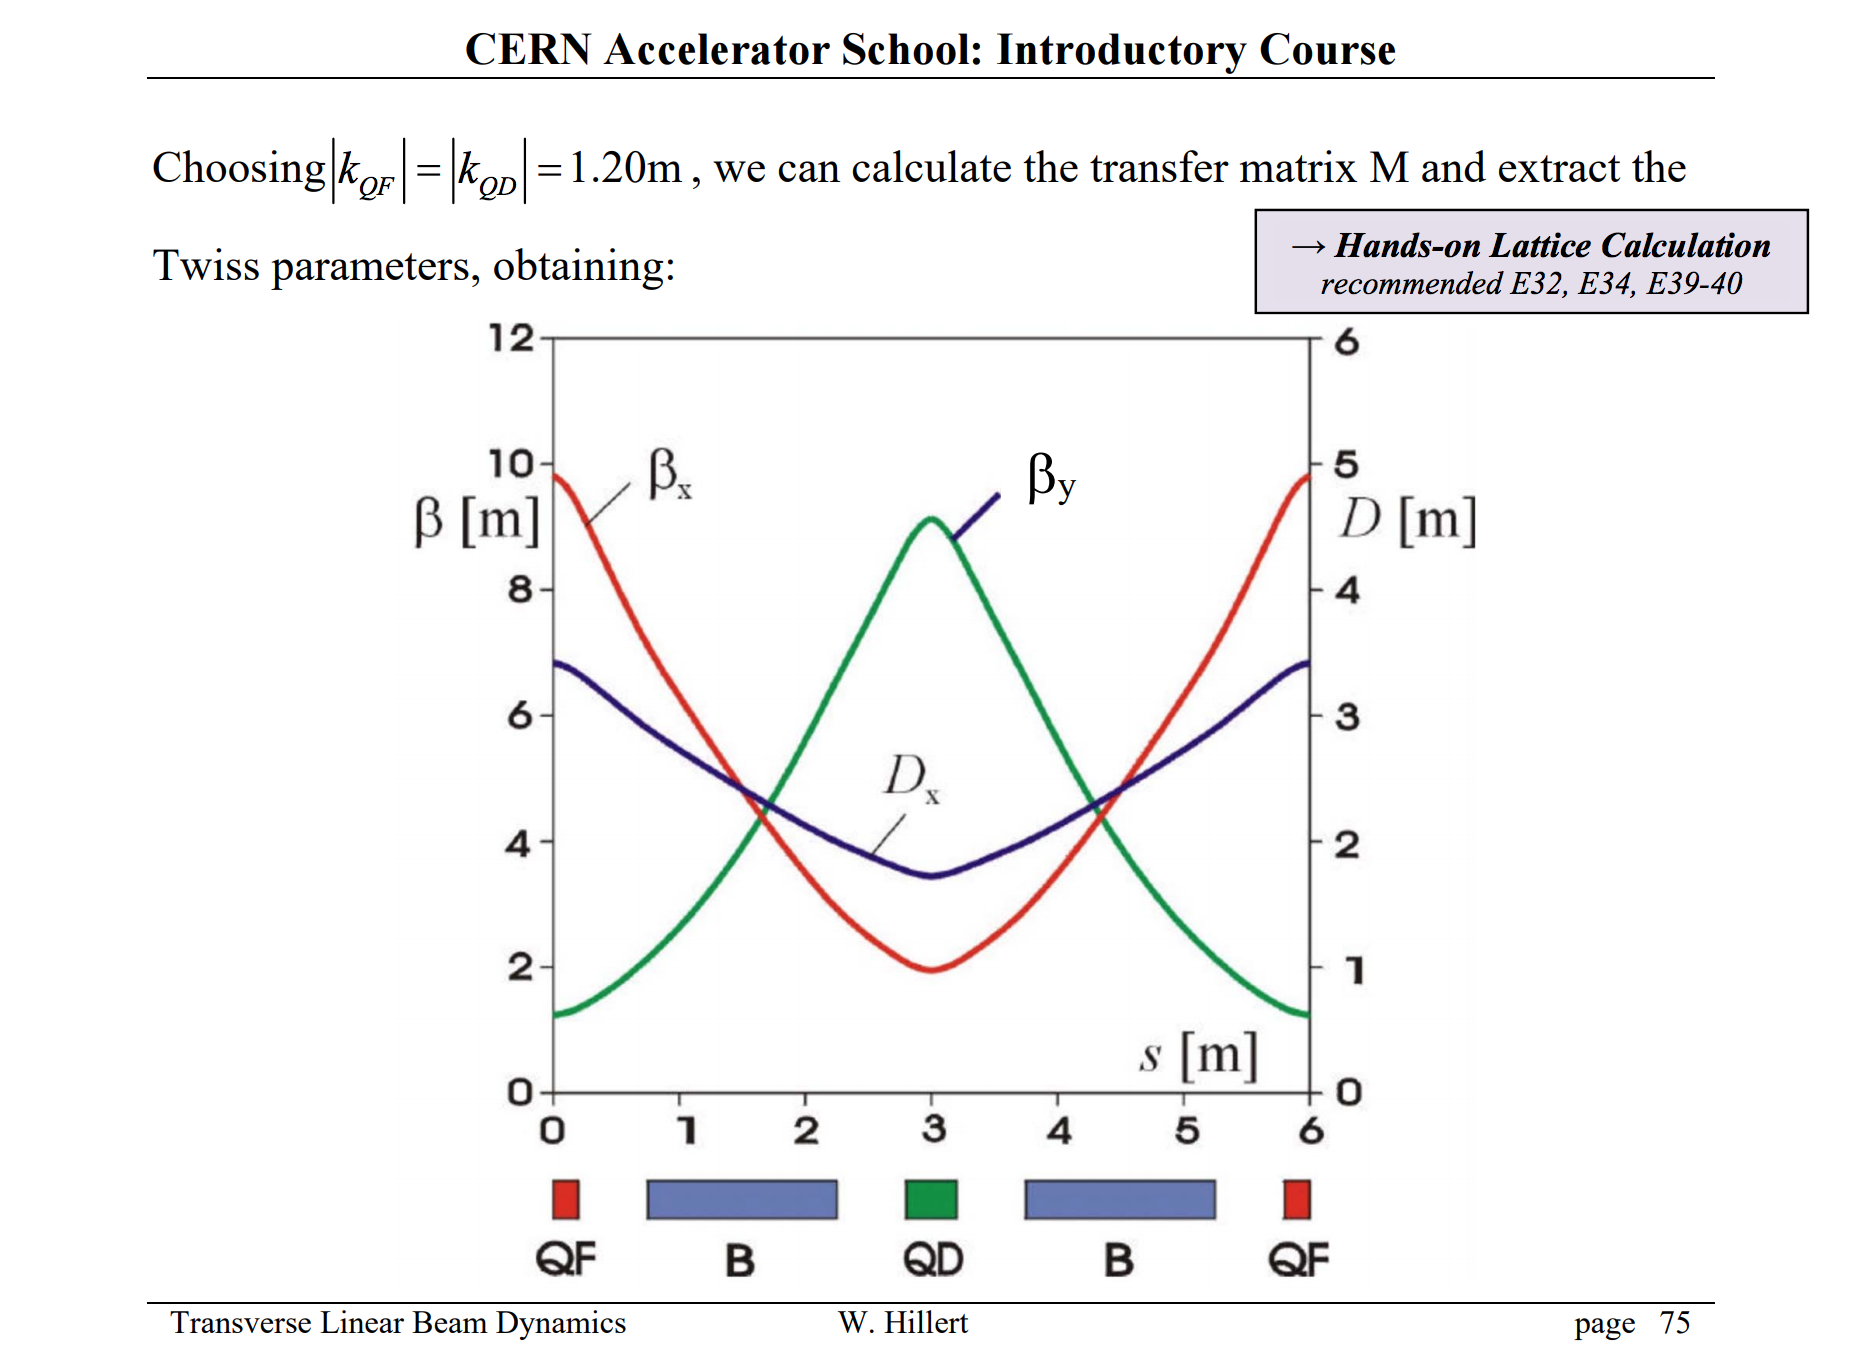

In [27]:
# Refer to 
from IPython.display import Image
fig = Image(filename=('/Users/sterbini/CERNBox/2019/CAS/Vysoke_Tatry/Python/Saturday/pag75.png'))
fig

---
# Exercise 29 

Introduce as a new element the **thick quadrupoles matrices**.
Hint:  write an external function that returns the corresponding list of tuple.


---
# Exercise 30

Use the beam line from Exercise 27 (60 degrees/cell FODO) and **replace the thin quadrupoles by long quadrupoles** with a length of 0.2, 0.4, 1.0 m.  Make sure the overall length and the phase advance of the FODO cell remains unchanged. By how much does the periodic beta function at the start of the cell change? Express the change in percent. 

---
# Exercise 31

Program the element corresponding to the **weak focusing of a sector bend** (see the [Primer](https://indico.cern.ch/event/808940/contributions/3553546/attachments/1904762/3145489/CAS_Optics_Primer.pdf)). 

---
# Exercise 32
**Insert 1 m long dipoles** in the center of the drift spaces of the FODO cells from Exercise 27 while keeping the length of the cell constant. Investigate deflection angles of φ= 5, 10 and 20 degrees.  Check by how much the periodic beta functions change.  Why do they change?  Explain!  Can you compensate the phase advance $\mu$ by adjusting the strength or focal lengths of the quadrupoles?

---
# From 2x2 to 3x3 matrices

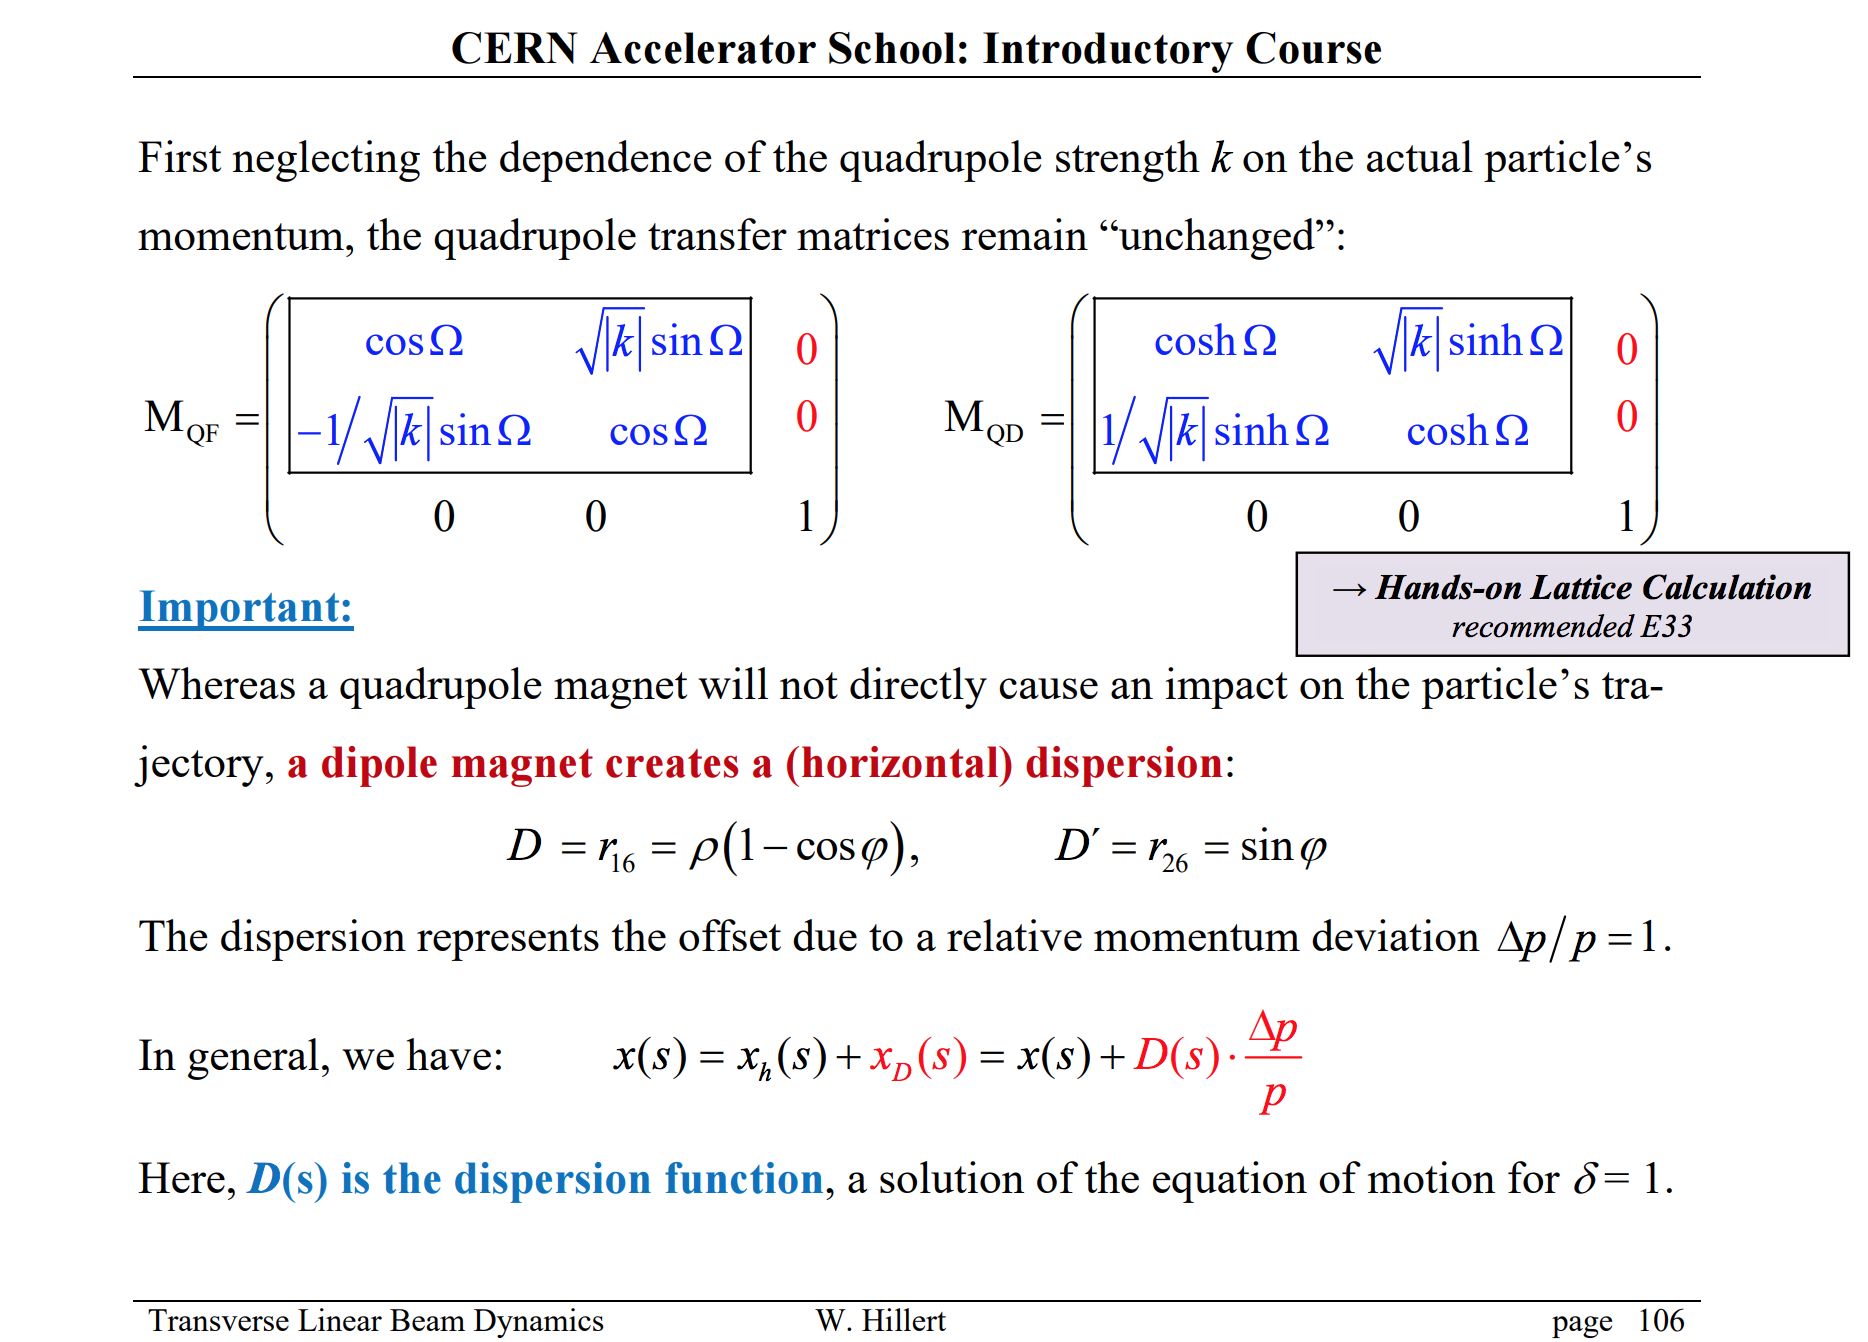

In [22]:
# Refer to 
from IPython.display import Image
fig = Image(filename=('/Users/sterbini/CERNBox/2019/CAS/Vysoke_Tatry/Python/Saturday/pag106.png'))
fig

---
# Exercise 33
**Upgrade the software to consistently handle $3\times3$ matrices** for drift space, quadrupoles, and sector dipoles.

# About dispersion

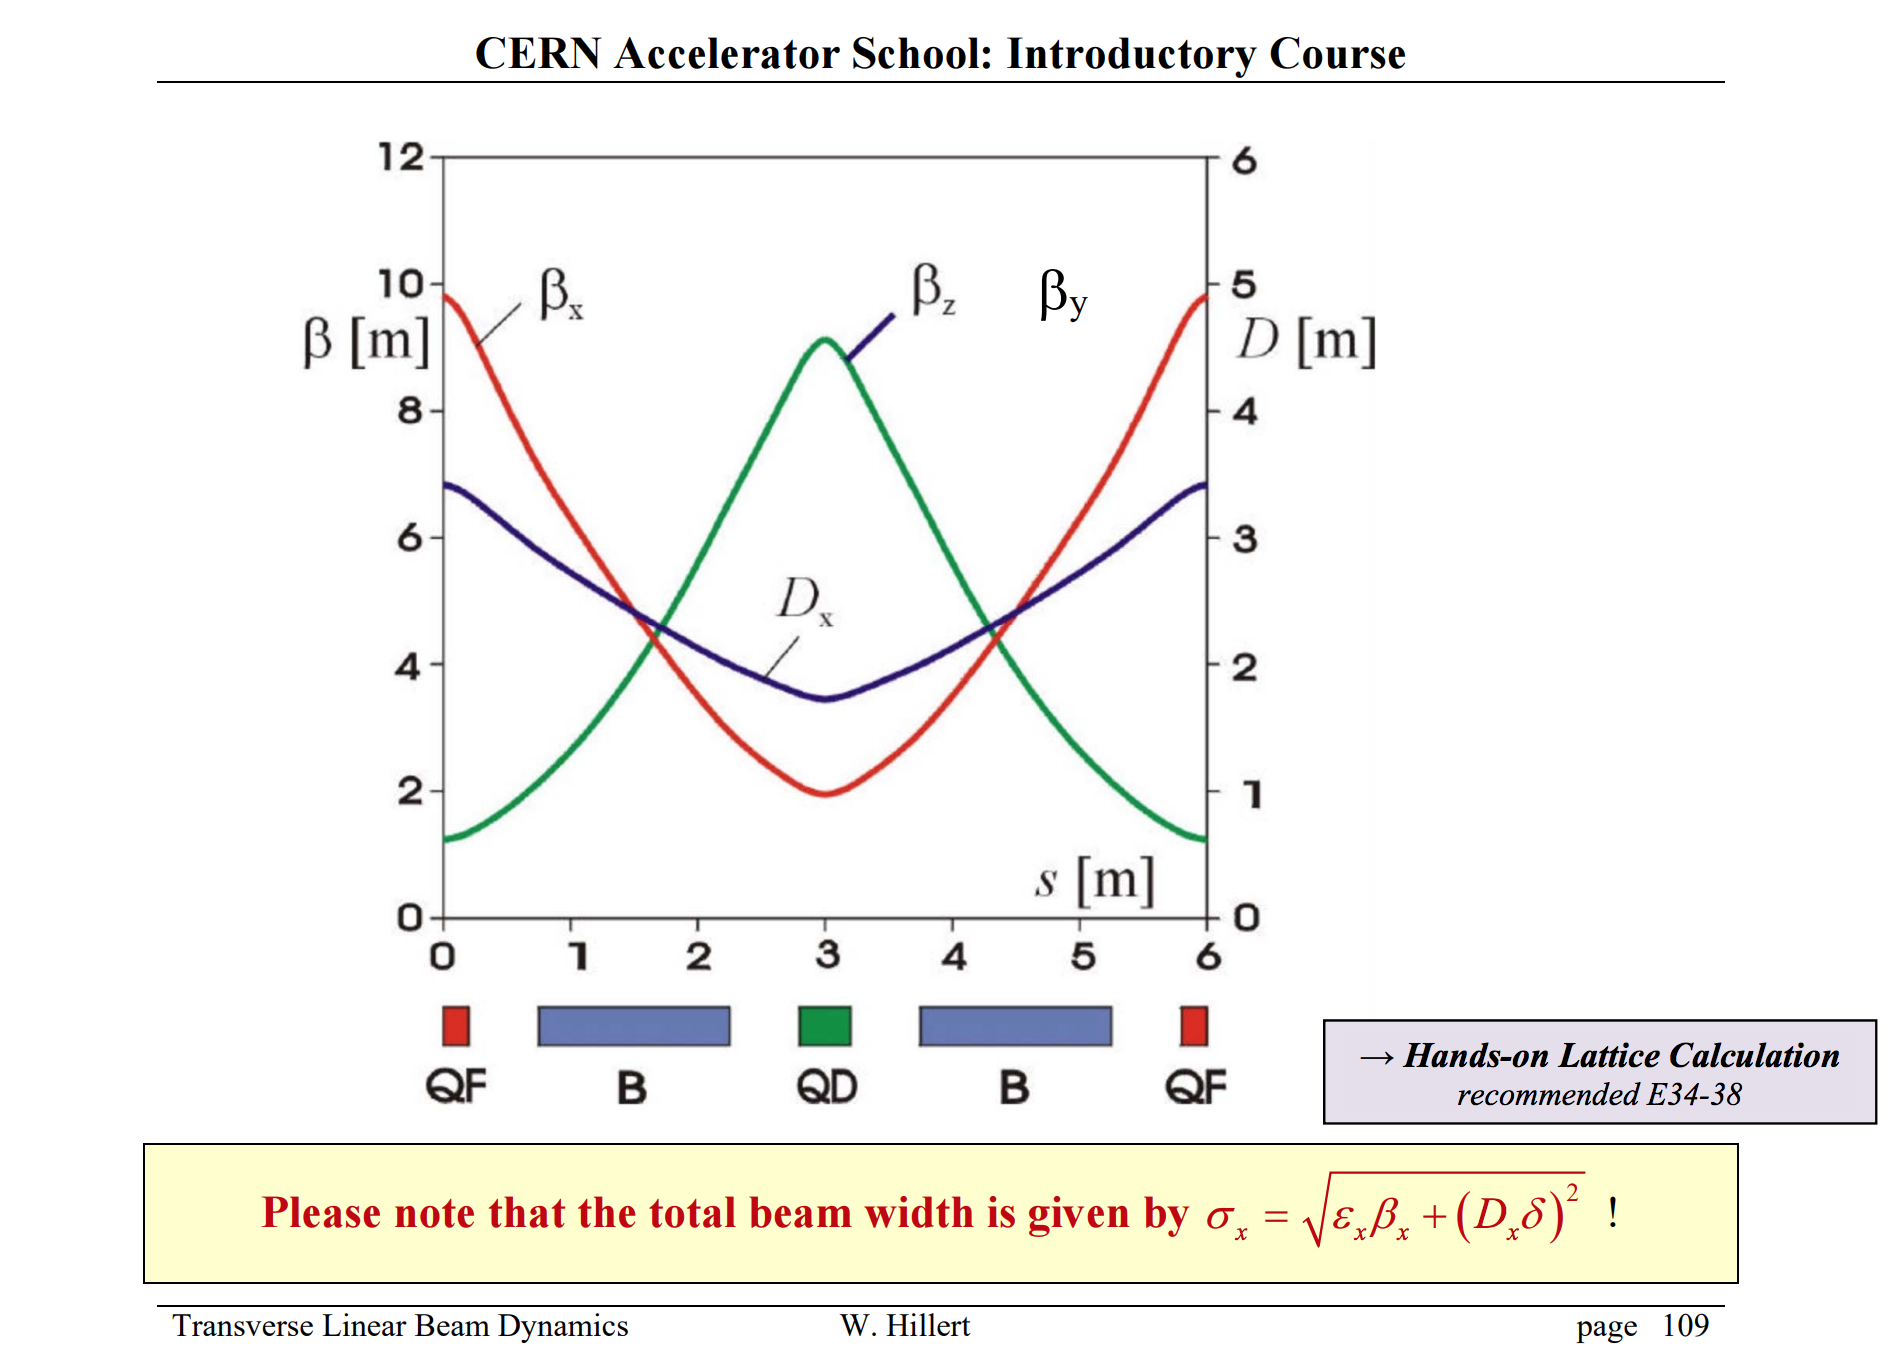

In [34]:
# Refer to 
from IPython.display import Image
fig = Image(filename=('/Users/sterbini/CERNBox/2019/CAS/Vysoke_Tatry/Python/Saturday/pag109.png'))
fig

---
# Exercise 34
Build a beam line of six FODO cells with a phase advance of 60 degrees/cell (thin quadrupoles are OK to use) and add a sector bending magnet with length 1 m and bending angle $\phi=10$ degrees in the center of each drift. You may have to play with the quadrupole values to make the phase advance close to 60 degrees. But you probably already did this in Exercise 32.

---
# Exercise 35
Use the starting conditions $(x_0,x_0',\delta)=(0,0,0)$ and plot the position along the beam line. **Repeat this for $\delta=10^{-3}$ and for $\delta=3\times 10^{-3}$**. Plot all three traces in the same graph. Discuss what you observe and explain!


---
# Exercise 36
Work out the transverse components of the periodic beam matrix $\sigma_0$. Assume that the emittance is $\epsilon_0=10^{-6}$ meter-rad. Furthermore, assume that the momentum spread $\sigma_0(3,3)=\sigma_p^2$ is zero and plot the **beam size**.

---
# Exercise 37
Plot the beam size for for $\sigma_p^2=10^{-3}$ and for $\sigma_p^2=3\times 10^{-3}$. What happens if you change the phase advance of the cell? Try out by slightly changing the focal lengths.

---
# Exercise 38: IMPORTANT, periodic dispersion

Determine the periodic dispersion at the start of the cell. Then plot the dispersion in the cell.

*Hint*

For that we need to solve the problem 

\begin{equation}
M_{OTM}\times D=D
\end{equation}

---
# Exercise 39
Convert the code to use $4\times4$ matrices, where the third and fourth columns are associated with the vertical plane. 

---
# Exercise 40
Start from a single FODO cell with 60 degrees/cell you used earlier. Insert sector bending magnets with a bending angle of $\phi=10\,$degrees in the center of the drift spaces. The bending magnets will spoil the phase advance in one plane. Now you have two phase advances and need to adjust both quadrupoles (by hand to 2 significant figures) such that it really is 60 degrees in both planes.

---
# Exercise 41

Use the result from exercise 40 and adjust the two quadrupoles such that the phase advance in the horizontal plane is 90 degrees, cell, while it remains 60 degrees/cell in the vertical plane. 

---
# Exercise 42
Prepare a beam line with eight FODO cells without bending magnets and with 60 degrees/cell phase advance in both planes. (a) Prepare the periodic beam  matrix sigma0 (4x4, uncoupled) as the initial beam and plot both beam sizes along the beam line. (b) Use sigma0 as the starting beam, but change the focal length of the second quadrupole by 10\% and plot the beam sizes once again. Discuss you observations.


---
# Exercise 43
You learnt about coupling from Wolfgang's and Volker's lectures.
Extend the simulation code to handle solenoids. One has to know that the solenoid's matrix is
\begin{equation}
M_{\text {SOLENOID}}=\left(\begin{array}{cccc}{C^{2}} & {\frac{1}{K} S C} & {S C} & {\frac{1}{K} S^{2}}\\
{-K S C} & {C^{2}} & {-K S^{2}} & {S C}\\
{-S C} & {-\frac{1}{K} S^{2}} & {C^{2}} & {\frac{1}{K} S C}\\
{K S^{2}} & {-S C} & {-K S C} & {C^{2}}
\end{array}\right)
\end{equation}
where
\begin{equation}
K=\operatorname{sgn}(\mathrm{q}) \frac{B_{s}}{2(B \rho)}
\end{equation}
and
\begin{equation}
\begin{array}{l}{C=\cos K L} \\ {S=\sin K L}\end{array}
\end{equation}

Check the simplecticity of the matrix (assuming some given parameters, example: $B_s=0.2$ T, $L=1$ m, $B \rho$=0.1 Tm and $sgn(q)=1$).
Define a beam line where you place the solenoid in the middle of a FODO cell and follow a particle with initial condition $(x_0,x'_0,y_0,y'_0)=(1\times10^3\,\mathrm{m},0,0,0).$ What do you observe? Is the motion confined to the horizontal plane? 